In [1]:
# Se cargan las librerías necesarias para la parte de: ANÁLISIS ESTADÍSTICO
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt

# Función análisis estadístico que guarda en ficheros .csv los resultados de los análisis e histograma
def analisisEstadistico(df):
    # Se crea el fichero .csv y se guarda las estadísticas de media, mínimo, máximo, etc. en él
    stat = df.describe()
    s='stats.csv'
    full_path = '/home/andreacc/redes-de-prueba/Datos/'
    new_df = stat.to_csv(s)
    print("###########################################\n")
    
    # Análisis agrupado por el TEA
    statsByTEA = df.groupby('TEA').describe()
    print(statsByTEA)
    # Se crea el fichero .csv y se guarda las estadísticas agrupadas por TEA en él
    s='statByTEA.csv'
    full_path = '/home/andreacc/redes-de-prueba/Datos/'
    new_df = statsByTEA.to_csv(s)
    print("###########################################\n")
    
    # Cuantos casos con TEA # ESTO SOLO FUNCIONA CON CASOS con TEA, Porque dudosos hay que ver ambas opciones
    amountTEA = df.groupby('TEA').size()
    print('La cantidades de TEA o no TEA es:\n')
    print(amountTEA)
    print("###########################################\n")
    
    # Análisis por coeficiente de correlación de Pearson
    corr = df.corr(method='pearson')
    print("Matriz Correlación de Pearson")
    print(corr,"\n")
    # Se crea el fichero .csv y se guarda las estadísticas al calcular el coeficiente de correlación de Pearson
    # se utiliza para estudiar la relación (o correlación) entre las variables aleatorias cuantitativas
    # en este caso la relación de cada variable con el resto
    s='corrPearson.csv'
    full_path = '/home/andreacc/redes-de-prueba/Datos/'
    new_df = corr.to_csv(s)
    print("###########################################\n")
    
    # SESGO Y KURT
    # El sesgo es sun valor constante (o un vector constante) que se suma al producto de las entrada
    # Este se utiliza para compensar el resultado de la función de activación hacia el lado positivo o negativo.
    sesgo = df.skew()
    
    # La curtosis, también llamada apuntamiento, es una medida estadística que indica el grado de concentración
    # de una distribución alrededor de su media. Esta muestra si una distribución es escarpada o achatada. 
    # En concreto, cuanto mayor sea la curtosis de una distribución más apuntada es.
    kurt = df.kurtosis()
    print ('------------------SESGO --------------------')
    print (sesgo)
    
    print("###########################################\n")
    print ('---------------- CURTOSIS -------------------')
    print (kurt)
    
    print("###########################################\n")
    
    # HISTOGRAMA del dataset
    fig = df.hist(bins=15,
                  color='blue', 
                  edgecolor='black', linewidth =1.0 ,
                  xlabelsize=10, ylabelsize=10,
                  xrot=45, yrot=0,
                  figsize=(10,9),
                  grid= False )
    plt.tight_layout(rect=(0, 0, 1.5 , 1.5))
    plt.title('Histogramas')
    plt.savefig('hist.png',bbox_inches='tight',dpi=300)
    plt.clf()

In [2]:
# Se cargan las librerías necesarias para la parte de: Borrar la carpeta ALL
import shutil
def borrarAll():
    dirPath = 'DATOS/ALL'

    try:
        # Borrar de forma recursiva el directorio (esto será al pulsar "0" Salir en el menú)
        shutil.rmtree(dirPath)
        print('Carpeta',nombre,'borrada correctamente!')
    except OSError as e:
        print(f"Error:{ e.strerror}")

In [3]:
# Se cargan las librerías necesarias para la parte de: LIMPIEZA Y CODIFICACIÓN
import os
def crearAll():
    full_path = '/home/andreacc/DATOS/'
    nombre = 'ALL'
    dst = full_path+nombre
    os.mkdir(dst)
    print('Carpeta',nombre,'creada correctamente!')
crearAll()

Carpeta ALL creada correctamente!


In [21]:
# Se cargan las librerías necesarias para la parte de: PRE TRATAMIENTO DE LOS DATOS

# La función dividirSecuencias realizará el algoritmo de una ventana deslizante para separar el dataframe según los pasos,
#tomará un conjunto de datos como se ha definido (filas) para pasos de tiempo 
#y las columnas para series paralelas y devolverá muestras de entrada/salida.
def dividirSecuencias(matrix, n_steps):
    X, y = list(), list()
    for i in range(len(matrix)):
        # Encuentra el final del patrón
        end_ix = i + n_steps
        # Comprobar si se está más allá del conjunto de datos
        if end_ix >= len(matrix):
             break
        # De X escogerá los primeros 15 conjuntos con las 6 primeras características
        # De y escogerá el último valor después de los 15 conjuntos de datos y corresponde a la
        #última característica ('TEA')
        seq_x, seq_y = matrix[i:end_ix, :-1], matrix[end_ix-1, -1]
        
        X.append(seq_x)
        y.append(seq_y)
    # Devolverlo en forma de array
    return array(X), array(y)

def tratamientoDatos(df_train):
     # Convertir la columna StricAvegX e Y en un array
    X_train = df_train.iloc[:, [0,1,2,3,4,5,6]].to_numpy() # Las 7 primeras columnas
    Y_train = df_train.iloc[:, 7].to_numpy() # La última columna, la de 'TEA' hará de salida
    
    # Tratamiento de los datos
    print("###########################################")
    print("Tratamiento de los datos: ")
    print("-------------------------------------------\n")
    print("Columna x train (6 primeras columnas):")
    print(X_train) # Columna X
    print("\nColumna Y train (columna = 'TEA'):")
    print(Y_train) # Columna Y salida
    
    # Matriz X e Y unificada
    matrix = np.append(X_train, Y_train[:, None], axis=1)
    print("\nMatriz final\n X Y:")
    print(matrix)
    
    # Elegir un número de pasos de tiempo
    n_steps = 15
    
   
    # Convertir la matriz en un array de arrays divididos por el número de pasos (ventana deslizante)
    X, y = dividirSecuencias(matrix, n_steps)
    
    # Se remodela la estructura del valor y
    y = y.reshape(-1, 1)
    
    return X, y, n_steps
    
   

In [22]:
# Función OneHotEncoder() encargada de la conversión del valor y en una categoría binaria de 0 y 1
def OneHotEncoderFunction(y):
    # Se codifica la columna 'TEA' del dataframe con el OneHotEncoder
    ohe = OneHotEncoder()
    transformed = ohe.fit_transform(y) 
    # Se convierte en un array ya codificado con el OneHotEncoder()
    Y = transformed.toarray()  
    print("\nArray codificado columna 'TEA':")
    print(Y)
    print("TEA_enconder shape:", Y.shape)
    return Y
    

In [7]:
# Se cargan las librerías necesarias para la parte de: LIMPIEZA Y CODIFICACIÓN
import os
import pandas as pd
import glob
import errno
import shutil
from pathlib import Path  
import csv
import os.path as path


# Función que codifica y limpia los valores a utilizar
# recibe un tipo que es el nombre de la carpeta con la que trabajará la red
def limpiarCodificar (tipo):
    tipo = tipo.upper()
    columns=[]
    
    # Ruta donde se aloja los ficheros dentro de la carpeta pasada por argumento
    path = "DATOS/"+tipo+"/"
    # Todos los ficheros .csv dentro del directorio
    csv_files = glob.glob(path + '*.csv')
    # Nuevo nombre con el que se mostrará el fichero con los valores preparados
    new_file_name = ""

    # Según el tipo de carpeta se mostrarán unas ciertas columnas, las que sean prescindibles
    # La carpeta "CASOS" tiene como diferencia de "CONTROLES" y "DUDOSOS" que hay una columna de TEA
    # Donde la variable TEA indica si el usuario tiene o no algún tipo de autismo
    if tipo == 'CASOS':
        columns = ['GazeEventType', 'GazeEventDuration', 'FixationPointX (MCSpx)', 'FixationPointY (MCSpx)',
               'GazePointIndex', 'StrictAverageGazePointX (ADCSmm)', 'StrictAverageGazePointY (ADCSmm)', 'LocalTimeStamp',
               'TEA']

    elif tipo == 'CONTROLES' or tipo == 'DUDOSOS': 
        columns = ['GazeEventType', 'GazeEventDuration', 'FixationPointX (MCSpx)', 'FixationPointY (MCSpx)',
               'GazePointIndex', 'StrictAverageGazePointX (ADCSmm)', 'StrictAverageGazePointY (ADCSmm)', 'LocalTimeStamp']
       

   # Si no existe el directorio se imprime que "No existe tipo de directorio especificado"
    else :
        print ("No existe tipo de directorio especificado")
        return
        
    # Para cada fichero de todos los .csv primero se copia y se hace un nuevo fichero que se denota
    # "_new.csv" y sobre este es donde se limpiará y preparará los datos
    for filename in csv_files:
        new_file = filename.replace(".csv", "_new.csv")
        
        # Comprobar si existe ya un fichero, si ya existe se notifica imprimiendo por pantalla
        # Si no se copia todos los datos del dataset en el nuevo fichero
        if os.path.isfile(new_file) is True:
            print("El fichero ya existe")
            pass
        else:
            shutil.copyfile(filename, new_file)
            data = pd.read_csv(new_file, sep=';', encoding='latin')
            
            # Se muestra el dataset completo
            print(data)
            print("Dataset recibido:")
            print(data.columns.values)
            
            ############## PARTE DE CODIFICACION ###################
            
            
            # Se generan la clave y valor del diccionario
            value=[i for i in range (1,23)] # Valor ( del 1 a 22)
            key=[ 'escena' +str(i) for i in range (1,23)] # Clave ( desde escena1 a escena22 )

            # Se crea el diccionario con la funcion dict
            #dic_SceneName=dict(zip(key ,value))
            #dic_SceneName['fijacion']=0 # Se incluye el caso fijacion con valor 0

            # Se genera el diccionario para sustituir la variable GazeEvent
            dic_GazeEvent = {'Fixation': 0,
                             'Saccade': 1,
                             'Unclassified': 2
                            }
            
            
            #### IMPRIME LAS COLUMNAS QUE TIENE EL DATASET ####
            #print(my_df.columns.values)
            
            # Se elimina (dropna) los valores faltantes de las columnas (subset) "StrictAverageGazePointX (ADCSmm)"
            #y "StrictAverageGazePointY (ADCSmm)"
            dat = data.dropna(subset = ['StrictAverageGazePointX (ADCSmm)', 'StrictAverageGazePointY (ADCSmm)'])
            # Se sustituyen las variables categoricas por las indicadas en los diccionarios anteriores
            #datos2 = dat.replace(dic_SceneName)
            datos2 = dat.replace(dic_GazeEvent)
            
            # Se eliminan las filas con valores NaN de las columnas 'FixationPointX (MCSpx)' y 'FixationPointY (MCSpx)'
            datos2 = datos2[datos2['FixationPointX (MCSpx)'].notna()]
            datos2 = datos2[datos2['FixationPointY (MCSpx)'].notna()]
            
            # Se guarda el dataset con las columnas que se desea tener en el estudio
            my_df = datos2[columns]
            
            # Se filtra mostrando sólo las filas de 'Fixation', es decir en el diccionario equivale a 0
            my_df = my_df.drop(my_df[(my_df.GazeEventType == 1) | (my_df.GazeEventType == 2)].index)
            

            # Se elimina la columna 'GazeEventType' ya que no se necesitará más
            my_df = my_df.drop(columns=['GazeEventType'])
            
        
            # Convertir la columna de 'LocalTimeStamp' de tipo object en tipo datetime
            my_df['LocalTimeStamp'] = pd.to_datetime(my_df['LocalTimeStamp'])

            # Se crea una nueva columna con la diferencia de tiempos de la actual fila y la anterior
            my_df['LocalTimeStampDiff'] = my_df['LocalTimeStamp'].diff()


            # Se convierte a flotante milisegundos
            my_df['LocalTimeStampDiff'] = my_df['LocalTimeStampDiff'].astype(np.int64)/10**6

            my_df.iloc[0,my_df.columns.get_loc('LocalTimeStampDiff')] = 0

            # Se elimina la columna 'LocalTimeStamp' ya que se trabajó y no se necesita más
            my_df = my_df.drop(columns=['LocalTimeStamp'])
            
            if tipo == 'CASOS':
                my_df = my_df.reindex(columns=['GazeEventDuration', 'FixationPointX (MCSpx)', 'FixationPointY (MCSpx)',
               'GazePointIndex', 'StrictAverageGazePointX (ADCSmm)', 'StrictAverageGazePointY (ADCSmm)', 'LocalTimeStampDiff',
               'TEA']) 
            
            
            # Se imprime el dataset codificado, este depende de la carpeta pasará previamente por una codificación o no
            print("###########################################")
            print("Dataset codificado correctamente:")
            print("-------------------------------------------\n")
            
            # Codificación ficheros de la carpeta 'DUDOSOS'
            if tipo == 'DUDOSOS':
                # Reemplazar los valores de las columnas 'StrictAverageGazePointX (ADCSmm)' e 'StrictAverageGazePointY (ADCSmm)'
                #que contienen , por .
                my_df['StrictAverageGazePointX (ADCSmm)'] = my_df['StrictAverageGazePointX (ADCSmm)'].str.replace(',','.')
                my_df['StrictAverageGazePointY (ADCSmm)'] = my_df['StrictAverageGazePointY (ADCSmm)'].str.replace(',','.')
                # Reemplazar los valores de las columnas 'GazeEventDuration' y 'GazePointIndex' que contienen , por .
                my_df['GazeEventDuration'] = my_df['GazeEventDuration'].str.replace(',','.')
                my_df['GazePointIndex'] = my_df['GazePointIndex'].str.replace(',','.')
                
                
                # Convertir dichas columnas de object string a valores flotantes
                my_df['StrictAverageGazePointX (ADCSmm)'] = my_df['StrictAverageGazePointX (ADCSmm)'].astype(float)
                my_df['StrictAverageGazePointY (ADCSmm)'] = my_df['StrictAverageGazePointY (ADCSmm)'].astype(float)
                my_df['GazeEventDuration'] = my_df['GazeEventDuration'].astype(float)
                my_df['GazePointIndex'] = my_df['GazePointIndex'].astype(float)
            
           
            
            elif tipo == 'CONTROLES':
                my_df['TEA'] = 0
   
            
            # Imprimir el dataset
            print(my_df)
            # Imprimir el tipo de variable de cada característica (columna)
            print(my_df.dtypes)
            
            ############## Llamar a la parte de análisis descriptivo ###################
            # Análisis de datos
            # Llamar a una funciona que saque datos estadísticos
            print("El análisis estadístico, por TEA, es: \n")
            analisisEstadistico(my_df)  ## Como opción que reciba un segundo argumento que explique como quiere agrupar el
                                        ## análisis, si normal o por TEA, sesgo y Kurt, correlación de Pearson
        
            # Se modifica el nombre de los ficheros modificados, ahora se guardan en dicho _new.csv
            new_df = my_df.to_csv(new_file)
        
            dst = '/home/andreacc/DATOS/ALL'
            files = glob.glob1(path, '*_new.csv')

            for i in files:
                shutil.move(os.path.join(path, i), os.path.join(dst, i))
 
            
            
    # Se llama a la funcion de limpieza y codificación de los datos  
limpiarCodificar('controles')


/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (24,25,26,27,32,33,34,40,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
43981  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43982  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43983  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43984  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43985  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate RecordingDuration RecordingResolution FixationFilter  \
0        23/03/2017          146630,0            1024x768  

/tmp/ipykernel_764/2920918875.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')
/tmp/ipykernel_764/2920918875.py:46: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sesgo = df.skew()
/tmp/ipykernel_764/2920918875.py:51: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt = df.kurtosis()
/tmp/ipykernel_764/3385859094.py:55: Dtype

       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44251  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44252  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44253  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44254  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44255  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        24/03/2015             147529            1024x768

/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (32,33,34,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
43950  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43951  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43952  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43953  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43954  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate RecordingDuration RecordingResolution FixationFilter  \
0        08/10/2015          146521,0            1024x768  

/tmp/ipykernel_764/2920918875.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')
/tmp/ipykernel_764/2920918875.py:46: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sesgo = df.skew()
/tmp/ipykernel_764/2920918875.py:51: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt = df.kurtosis()
/tmp/ipykernel_764/3385859094.py:55: Dtype

       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44034  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44035  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44036  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44037  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44038  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        05/06/2015             146857            1024x768

/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (32,33,34,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44046  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44047  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44048  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44049  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
44050  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate RecordingDuration RecordingResolution FixationFilter  \
0        09/12/2015          146869,0            1024x768  

/tmp/ipykernel_764/2920918875.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')
/tmp/ipykernel_764/2920918875.py:46: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sesgo = df.skew()
/tmp/ipykernel_764/2920918875.py:51: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt = df.kurtosis()
/tmp/ipykernel_764/3385859094.py:55: Dtype

       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44302  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44303  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44304  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44305  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44306  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        25/03/2015             147723            1024x768

/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44051  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44052  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44053  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44054  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44055  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        26/03/2015             146876            1024x768

/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44066  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44067  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44068  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44069  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44070  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        20/03/2015             146939            1024x768

/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
44217  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44218  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44219  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44220  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   
44221  26/04/2017            3.1.3  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        23/03/2015             147493            1024x768

/tmp/ipykernel_764/3385859094.py:55: DtypeWarning: Columns (32,33,34,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(new_file, sep=';', encoding='latin')


       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
43995  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43996  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43997  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43998  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43999  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate RecordingDuration RecordingResolution FixationFilter  \
0        23/03/2017          146666,0            1024x768  

/tmp/ipykernel_764/2920918875.py:32: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='pearson')
/tmp/ipykernel_764/2920918875.py:46: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  sesgo = df.skew()
/tmp/ipykernel_764/2920918875.py:51: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurt = df.kurtosis()
/tmp/ipykernel_764/3385859094.py:55: Dtype

       ExportDate StudioVersionRec  StudioProjectName StudioTestName  \
0      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
1      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
2      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
3      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
4      26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
...           ...              ...                ...            ...   
43995  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43996  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43997  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43998  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   
43999  26/04/2017            3.1.6  TEA-IMAGENES-TEST   TEA Imágenes   

      RecordingDate  RecordingDuration RecordingResolution FixationFilter  \
0        23/03/2017             146666            1024x768

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

<Figure size 720x648 with 0 Axes>

In [23]:
# Se cargan las librerías necesarias para la parte de: ENTRENAMIENTO DE MODELOS
import numpy as np
from numpy import array
from numpy import hstack
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt

# Librería scikit-learn
from sklearn import metrics
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.losses import categorical_crossentropy

from sklearn.preprocessing import OneHotEncoder 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedKFold

from sklearn.metrics import mean_squared_error


from sklearn.model_selection import KFold


# Función modelo CNN estándar para pronósticos de series temporales multivariados
#def CNNModel(X, y, X_test, Y_test, n_steps, n_features):
def CNNModel(X,Y, n_steps, n_features):
    # Optimizador y función de pérdida a elegir. 
    # optimizer = adam, adamax o nadam
    optimizer = 'adam'
    
    # Definición del modelo secuencial MaxPooling1D con función de activacion lineal (relu)
    model = keras.Sequential()
    # Añadiendo primera capa del modelo CNN de tipo Capa de convolución 1D 
    model.add(layers.Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    # Añadiendo segunda capa del modelo CNN de tipo MaxPooling1D
    model.add(layers.MaxPooling1D(pool_size=2))
    # Añadiendo tercera capa del modelo CNN de tipo Flatten
    model.add(layers.Flatten())
    # Añadiendo cuarta capa del modelo CNN de tipo Dense (densa)
    model.add(layers.Dense(50, activation='relu'))
    
    # Añadiendo quinta capa del modelo CNN de tipo Dense (densa) con función de activación softmax
    model.add(layers.Dense(2, activation = 'softmax'))
    
    # Compilación del modelo
    model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), 
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])
    
    print("###########################################")
    print("Modelo elegido: CNN")
    print("Optimizador elegido: ",optimizer)
    print("Modelo Compilado")
    print("###########################################\n\n")
    
    print("###########################################")
    print("Resumen del modelo:")
    print("-------------------------------------------\n")
    model.summary()
    
    # Entrenamiento del modelo
    print("###########################################")
    print("Comienzo del entreno")
    print("-------------------------------------------\n")
    
    # Tamaños de los test, train y validation data
    x, x_test, y, y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8)
    x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.25,train_size =0.75)
    
    
    #a_train = x_train[:,0,5]
    #a_test = x_test[:,0,5]
    #a_val = x_val[:,0,5]
    
    #a = np.unique(a_train)
    #b = np.unique(a_test)
    #c =np.unique(a_val)
    
    #print("aa:", a)
    #print("bb:", b)
    #print("cc:", c)
    
    #print("shape x_trai", x_train[:15,0,:])
    #print("shape x_test", x_test[:15,0,:])
    #print("shape x_test", x_val[:15,0,:])
    

    # Definir el número máximo de ciclos
    epochs = 100
    # Definir los datos de validación
    #validation_data = (x_val, y_val)
    validation_data = (x_val, y_val)
    # Con EarlyStopping evitamos el sobre entrenamiento ya que la devolución de llamada se
    # detendrá cuando no haya una mejora en la pérdida (monitor="loss") por tres épocas consecutivas (patience=3)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    # Definir el tamaño del lote esto es el número de muestras que se propagarán a través de la red
    batch_size = 64
    # Entrenamiento del modelo
    history = model.fit(x_train,y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=validation_data,
                        callbacks=[callback])
    
    print("-------------------------------------------")
    print("Entreno finalizado correctamente")
    print("###########################################\n\n")
    
    # Definir los valores de las funciones de pérdidas reales y de pruebas, y de las precisiones reales y de pruebas
    modelLossValues = np.array(history.history['loss'])
    modelLossTestValues = np.array(history.history['val_loss'])
    modelAccValues = np.array(history.history['categorical_accuracy'])
    modelAccTestValues = np.array(history.history['val_categorical_accuracy'])
    
    print("Valores de pérdidas del entreno:")
    print(modelLossValues)
    
    print("Valores de pérdidas de las pruebas:")
    print(modelLossTestValues)
    
    print("Vueltas finales dada:")
    vueltas = len(history.history['loss'])
    print(vueltas)
    print("-------------------------------------------\n")
    
    # Evaluación de resultados
    print("###########################################")
    print("Evaluación ")
    print("-------------------------------------------\n")
    print("Evaluate model on test data")
    results = model.evaluate(x_val, y_val, verbose=2, batch_size=64)
    print("Test loss, Test accuracy:", results)
    print("-------------------------------------------\n")
          
    ###################################################
    print("###########################################")
    print("Gráficas de líneas ")
    print("-------------------------------------------\n")
  
    # Definir las variables de las gráficas
    x = np.array(range(0, vueltas))
    y = np.array(modelLossValues)
    y2 = np.array(modelLossTestValues)
    y3 = np.array(modelAccValues)
    y4 = np.array(modelAccTestValues)
    
    # Gráfica de líneas sobre la evolución de la función de pérdida por ciclo (epoch)
    redLine = plt.plot(x, y, color = "red", marker = "o", label='Función de pérdida real')
    greenLine = plt.plot(x, y2, color = "green", marker = "o", label='Función de pérdida de validación')
    plt.title("Gráfica de pérdidas/ciclo")
    plt.xlabel("Ciclos del entreno")
    plt.ylabel("Pérdidas (Train y Test)")
    plt.legend(['Función de pérdida real', 'Función de pérdida de validación'])
    plt.show()
    
    # Gráfica de líneas sobre la evolución de la precisión por ciclo (epoch) 
    redLine = plt.plot(x, y3, color = "red", marker = "o", label='Función de precisión real')
    greenLine = plt.plot(x, y4, color = "green", marker = "o", label='Función de precisión de validación')
    plt.title("Gráfica de precisión/ciclo")
    plt.xlabel("Ciclos del entreno")
    plt.ylabel("Precisión (Train y Test)")
    plt.legend(['Función de precisión real', 'Función de precisión de validación'])
    plt.show()
    
    # Predición de resultados
    print("###########################################")
    print("Predicción ")
    print("-------------------------------------------\n")
    # Calcula las predicciones
    predictions = model.predict(x_test)
    print('Predicción: ', predictions)
    # Redondea las predicciones
    rounded = [round(x[0]) for x in predictions]
    print(rounded)
    
    return model


   
    
# Función modelo LSTM estándar para pronósticos de series temporales
def LSTMModel(X, y, n_features):
    # Optimizador y función de pérdida a elegir. 
    # optimizer = adam, adamax o nadam
    optimizer = 'adam'
    
    # Definición del modelo secuencial tipo LSTM con función de activación lineal (relu)
    model = keras.Sequential()

    # Añadiendo primera capa del modelo LSTM con un dropout regularizado al 0.2
    # Dropout es un método de regularización en el que las conexiones recurrentes y de entrada a las unidades LSTM se 
    #excluyen probabilísticamente de las actualizaciones de activación y peso mientras se entrena una red. 
    #Esto tiene el efecto de reducir el sobreajuste y mejorar el rendimiento del modelo.
    model.add(layers.LSTM(units=128, return_sequences=True,
                   batch_size=3, input_shape=(None, n_features)))

    # Añadiendo segunda capa del modelo LSTM con un dropout regularizado al 0.2
    model.add(layers.LSTM(units=128, return_sequences=True, dropout=0.2))

    # Añadiendo tercera capa del modelo LSTM con un dropout regularizado al 0.2
    model.add(layers.LSTM(units=128, return_sequences=True,dropout=0.2))

    # Añadiendo cuarta capa del modelo LSTM con un dropout regularizado al 0.2
    model.add(layers.LSTM(units=128, return_sequences=False, dropout=0.2))
    # Añadiendo la capa de salida función de activación softmax
    model.add(layers.Dense(2, activation='softmax'))

    # Compilación del modelo
    model.compile(optimizer=optimizer, loss=tf.keras.losses.CategoricalCrossentropy(), 
                  metrics=[tf.keras.metrics.CategoricalAccuracy()])
    print("###########################################")

    print("Modelo elegido: LSTM")
    print("Optimizador elegido: ",optimizer)
    print("Modelo Compilado")
    print("###########################################\n\n")

    print("###########################################")
    print("Resumen del modelo:")
    print("-------------------------------------------\n")
    model.summary()

    # Entrenamiento del modelo
    print("###########################################")
    print("Comienzo del entreno")
    print("-------------------------------------------\n")
    validation_size = 0.1
    test_size = 0.1
    train_size= 0.8


    validation = validation_size / (test_size + validation_size)
    x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=train_size)
    x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, train_size=validation)

    # Definir el número máximo de ciclos
    epochs = 100
    # Definir los datos de validación
    validation_data = (x_test, y_test)
    # Con EarlyStopping evitamos el sobre entrenamiento ya que la devolución de llamada se
    # detendrá cuando no haya una mejora en la pérdida (monitor="loss") por tres épocas consecutivas (patience=3)
    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
    # Definir el tamaño del lote esto es el número de muestras que se propagarán a través de la red
    batch_size = 64

    # Entrenamiento de la red, muestra del entreno (verbose=1)
    history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_data=validation_data, 
                        callbacks=[callback])
    print("-------------------------------------------")
    print("Entreno finalizado correctamente")
    print("###########################################\n\n")

    # Definir los valores de las funciones de pérdidas reales y de pruebas
    modelLossValues = np.array(history.history['loss'])
    modelLossTestValues = np.array(history.history['val_loss'])
    modelAccValues = np.array(history.history['categorical_accuracy'])
    modelAccTestValues = np.array(history.history['val_categorical_accuracy'])

    print("Valores de pérdidas del entreno:")
    print(modelLossValues)

    print("Valores de pérdidas de las pruebas:")
    print(modelLossTestValues)

    print("Vueltas finales dada:")
    vueltas = len(history.history['loss'])
    print(vueltas)
    print("-------------------------------------------\n")

    # Evaluación de resultados
    print("###########################################")
    print("Evaluación ")
    print("-------------------------------------------\n")
    print("Evaluate model on test data")
    results = model.evaluate(x_test, y_test, verbose=2, batch_size=64)
    print("Test loss, Test accuracy:", results)
    print("-------------------------------------------\n")

    ###################################################
    print("###########################################")
    print("Gráficas de líneas ")
    print("-------------------------------------------\n")

    # Definición de variables de las gráficas
    x = np.array(range(0, vueltas))
    y = np.array(modelLossValues)
    y2 = np.array(modelLossTestValues)
    y3 = np.array(modelAccValues)
    y4 = np.array(modelAccTestValues)

    # Gráfica de líneas sobre la evolución de la función de pérdida por ciclo (epoch)
    redLine = plt.plot(x, y, color = "red", marker = "o", label='Función de pérdida real')
    greenLine = plt.plot(x, y2, color = "green", marker = "o", label='Función de pérdida de validación')
    plt.title("Gráfica de pérdidas/ciclo")
    plt.xlabel("Ciclos del entreno")
    plt.ylabel("Pérdidas (Train y Test)")
    plt.legend(['Función de pérdida real', 'Función de pérdida de validación'])
    plt.show()
    
    # Gráfica de líneas sobre la evolución de la precisión por ciclo (epoch) 
    redLine = plt.plot(x, y3, color = "red", marker = "o", label='Función de precisión real')
    greenLine = plt.plot(x, y4, color = "green", marker = "o", label='Función de precisión de validación')
    plt.title("Gráfica de precisión/ciclo")
    plt.xlabel("Ciclos del entreno")
    plt.ylabel("Precisión (Train y Test)")
    plt.legend(['Función de precisión real', 'Función de precisión de validación'])
    plt.show()

    # Predición de resultados
    print("###########################################")
    print("Predicción ")
    print("-------------------------------------------\n")
    # Calcula las predicciones
    predictions = model.predict(x_test)
    print('Predicción: ', predictions)
    # Redondea las predicciones
    rounded = [round(x[0]) for x in predictions]
    print(rounded)

    return model





# Método de entreno de la red neuronal, recibo el fichero .csv donde se trabajará
def entrenamiento(X,y, n_steps, n_features):
    
    # Menú para indicar el entrenamiento
    continuar = True
    while continuar:
        print("##################################################################") 
        print("# MENÚ")
        print("# Indique a continuación el tipo de modelo a entrenar (0, 1, 2 o 3):")
        print("# 0) Salir y BORRAR archivo de entrenamiento")
        print("# 1) Salir y MANTENER archivo de entrenamiento")
        print("# 2) Modelo CNN")
        print("# 3) Modelo LSTM")
        print("##################################################################")
        print("------------------------------------------------------------------")
        
        tipoEntreno = input("Indique una opción del menú: ")
        if (tipoEntreno == "0"):
            # Llama al método remove() que borra el archivo de entrenamiento
            os.remove('/home/andreacc/DATOS/ALL/archivo_train.csv')
            print("Saliendo y borrando...")
            continuar = False
        elif (tipoEntreno == "1"):
            print("Saliendo...")
            continuar = False
        elif (tipoEntreno == "2"):
            mod = CNNModel(X,y, n_steps, n_features)
        elif (tipoEntreno == "3"):
            mod = LSTMModel(X, y, n_features)
        else:
            print("El tipo de modelo no se reconoce, vuelve a introducirlo")
            
    
   

###########################################
Fichero leído:  04p
datos individuales: [483. 443. 401. 624. 669. 491. 683. 702. 439. 629. 717. 695. 640. 442.
 429. 421. 413. 493. 648. 339. 425. 269. 612. 678. 454. 452. 456. 542.
 435. 408. 399. 404. 209. 468. 485. 488. 486. 397. 335. 336. 302. 304.
 383. 412. 388. 426. 411. 341. 176. 549. 309. 215. 379. 389. 484. 385.
 347. 445. 372. 436. 230. 552. 551. 249. 539. 614. 288. 529. 424. 441.
 417. 407. 200. 153. 563. 101. 157. 622. 619. 617. 126. 350. 164.  14.
 338. 560. 478. 395. 376. 390. 245. 611. 146.  98. 242. 236. 193. 626.
 667. 668. 524. 418. 392. 371. 369. 348. 334. 596. 271. 151. 119. 278.
 207. 216. 218. 577. 299. 357. 589. 163. 162. 530. 531. 262. 386. 433.
 187. 658. 637. 287. 226. 646. 644. 137.  96. 355. 296. 258. 595. 635.
 438. 331. 330. 352. 575. 546. 517. 363. 232. 133.  87. 686. 688. 152.
 106. 391. 117. 645.  81.  63. 332. 360. 448. 628. 632. 634. 359. 145.
 554. 160. 155. 657. 878. 308. 410. 400.  67.  69.  31. 684. 764

2023-07-23 14:24:31.333630: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 14:24:31.336783: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 14:24:31.338430: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

###########################################
Modelo elegido: LSTM
Optimizador elegido:  adam
Modelo Compilado
###########################################


###########################################
Resumen del modelo:
-------------------------------------------

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (3, None, 128)            69632     
                                                                 
 lstm_13 (LSTM)              (3, None, 128)            131584    
                                                                 
 lstm_14 (LSTM)              (3, None, 128)            131584    
                                                                 
 lstm_15 (LSTM)              (3, 128)                  131584    
                                                                 
 dense_9 (Dense)             (3, 2)                   

2023-07-23 14:24:31.985080: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 14:24:31.987000: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 14:24:31.988046: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

###########################################
Comienzo del entreno
-------------------------------------------

Epoch 1/100


2023-07-23 14:24:32.703852: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 14:24:32.705832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 14:24:32.707307: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

668/669 [============================>.] - ETA: 0s - loss: 0.6691 - categorical_accuracy: 0.5898

2023-07-23 14:25:07.175590: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 14:25:07.177328: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 14:25:07.178696: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

669/669 [==============================] - 37s 42ms/step - loss: 0.6691 - categorical_accuracy: 0.5899 - val_loss: 0.6641 - val_categorical_accuracy: 0.5929
Epoch 2/100
669/669 [==============================] - 27s 41ms/step - loss: 0.6638 - categorical_accuracy: 0.5938 - val_loss: 0.6654 - val_categorical_accuracy: 0.5884
Epoch 3/100
669/669 [==============================] - 27s 41ms/step - loss: 0.6665 - categorical_accuracy: 0.5921 - val_loss: 0.6651 - val_categorical_accuracy: 0.5901
Epoch 4/100
669/669 [==============================] - 27s 41ms/step - loss: 0.6685 - categorical_accuracy: 0.5896 - val_loss: 0.6648 - val_categorical_accuracy: 0.5876
Epoch 5/100
669/669 [==============================] - 28s 41ms/step - loss: 0.6678 - categorical_accuracy: 0.5888 - val_loss: 0.6671 - val_categorical_accuracy: 0.5884
-------------------------------------------
Entreno finalizado correctamente
###########################################


Valores de pérdidas del entreno:
[0.66906965

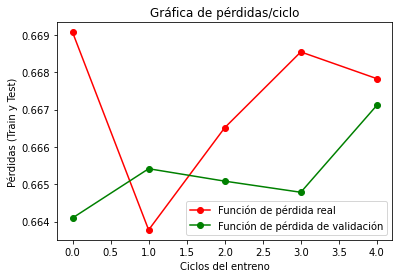

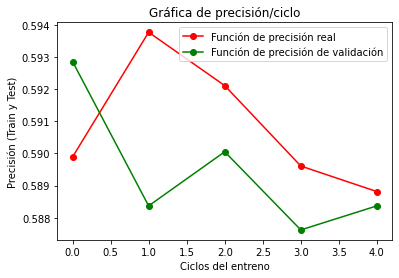

###########################################
Predicción 
-------------------------------------------



2023-07-23 14:27:00.459002: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-07-23 14:27:00.460564: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-07-23 14:27:00.461839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

168/168 [==============================] - 3s 11ms/step
Predicción:  [[0.5685449  0.43145508]
 [0.56151855 0.43848136]
 [0.5617759  0.43822408]
 ...
 [0.5615184  0.4384817 ]
 [0.56177604 0.43822396]
 [0.5615184  0.4384817 ]]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [24]:
# Se cargan las librerías necesarias para la parte de: CLASIFICACIÓN DE LOS DATOS
import os
import shutil
import numpy as np
import pandas as pd
import os.path as path

# Función (en estado "beta") que clasifica unificando los ficheros que se especifican para el entreno (train)
# y los que son para pruebas (test). Recibe también la ruta donde se alojan los ficheros.
# Devuelve dos dataframe, pero solo se trabaja en el entreno con "df_train"
## COMO PROPUESTA FUTURA: que sea una función nativa con un funcionamiento similar al de la función "train_test_split"
##de la librería de scikit-learn
def clasificarDatos (train, ruta):
    
    # Se definen los dataframes donde se devolverá los resultados a entrenar
    df_train = []
    
    x_value = []
    y_value = []
    
    ruta = ruta.upper()
    full_path = '/home/andreacc/DATOS/'
    path = "DATOS/"+ruta+"/"
    
    # Se convierte en minúsculas para poder trabajar correctamente con ellos
    train = [elem.lower() for elem in train]
    
    # Se define un diccionario con un nombre en específico para cada fichero del estudio
    ## PROPUESTA DE MEJORA A FUTUROS, EVITAR EL DICCIONARIO, SOLO BUSCAR FICHEROS _new.csv
    names = {'03p': '03-Punto_new',
             '04p': '04-Punto_new',
             '05p': '05-Punto_new',
             '06p': '06-Punto_new',
             '07p': '07-Punto_new',
             '08p': '08-Punto_new',
             '01cp': '01-ControlPunto_new',
             '02cp': '02-ControlPunto_new',
             '03cp': '03-ControlPunto_new',
             '04cp': '04-ControlPunto_new',
             '05cp': '05-ControlPunto_new',
             '09cp': '09-ControlPunto_new',
             '16ti': '16-TEA-IMAGENES-TEST_TEA Imagenes_new', 
             '17ti': '17-TEA-IMAGENES-TEST_TEA Imagenes_new',
             '18ti': '18-TEA-IMAGENES-TEST_TEA Imagenes_new',
             '19ti': '19-TEA-IMAGENES-TEST_TEA Imagenes_new',
             '19tip': '19-TEA-IMAGENES-TEST_TEA Imagenes_Punto_new',
             '01ti': '01-TEA-IMAGENES-TEST_TEA Imagenes_new', #dudosos
             '02ti': '02-TEA-IMAGENES-TEST_TEA Imagenes_new', #dudosos
             '10ti': '10-TEA-IMAGENES-TEST_TEA Imagenes_new', #dudosos
             '11ti': '11-TEA-IMAGENES-TEST_TEA Imagenes_new'  #dudosos
            }
    
    # Se crea el fichero ALL donde se guardarán los archivos del entrenamiento (archivo_train.csv)
    # y de los test unificados (archivo_test.csv)
    #os.mkdir(full_path+'ALL')
    
    
    # Para cada nombre de los ficheros del entrenamiento
    for name in train:
        # Si no se encuentra dicho nombre en el diccionario sale del programa.
        if not(name in names) :
            print ("El nombre de archivo "+ str(name) +" no existe")
            return
        else :
        # Se busca el archivo con el nombre especificado en el directorio.    
            archivo = names[name]
            
            archivo_ = path + archivo + '.csv'
            
            with open (archivo_, newline='') as file:
                
                actual_name= name
                print('###########################################')
                print('Fichero leído: ', actual_name)
            
                data = pd.read_csv(file, sep=',', encoding='latin-1',index_col = 0)
                
                
                print("datos individuales:", data.iloc[:,1].unique())
                
                # Se pasa al tratamiento previo de los datos
                X, Y, n_steps = tratamientoDatos(data)
                
                # Concatenación de todos los X de cada fichero
                if len(x_value) == 0:
                    x_value = X
                else:
                    x_value = np.concatenate((x_value, X))
                
                # Concatenación de todos los Y de cada fichero
                if len(y_value) == 0:
                    y_value = Y
                else:
                    y_value = np.concatenate((y_value, Y))
                
            
                # Se almacenan los datos
                df_train.append(data)
                
                # Se almacena el array en un dataframe unificado 
                archivo_train = pd.concat(df_train)
                
               
                # El conjunto de datos conoce la cantidad de características, en este caso 7 (7 columnas)
                n_features = 7

                # Se crea el archivo unificado con nombre 'archivo_train.csv'
                new_file = archivo_train.to_csv(full_path+'ALL/'+"archivo_train.csv")
                
   
    
    y_value = OneHotEncoderFunction(y_value)
                
    # Se muestra el shape final de la X y de la Y al tratarse y unificarse los datos          
    print('VALOR X.SHAPE TOTAL: ', x_value.shape)
    print('VALOR Y.SHAPE TOTAL: ', y_value.shape)
    
    # Se devuelven las variables necesarias para el entrenamiento
    return archivo_train, x_value, y_value, n_steps, n_features

# Se llama a clasificarDatos y se pasan los ficheros por la nomenclatura establecida y la carpeta donde se alojan
df_train, x_value, y_value, n_steps, n_features = clasificarDatos (['04p', '01cp'], 'all')

# Se llama al entrenamiento, y se pasan las variables necesarias antes devueltas
entrenamiento(x_value, y_value, n_steps, n_features)



## borrarAll()